In [1]:
# HW7.1 Social Analytics - News Mood
import json
import tweepy
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
# TextBlob documentation/tutorial: http://textblob.readthedocs.io/en/dev/quickstart.html
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# VADER documentation on GitHub: https://github.com/cjhutto/vaderSentiment

analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "LL7NVFqNgt9m6dxBQQGTDy9oz"
consumer_secret = "tPyaUhp6GcShpS4BPaBWFVTeaw1VLZ9NeURyWC4y4AF6JVV8jl"
access_token = "975006981789487104-65UpeGTARtfxFhXXzlC4LkKjF1k7Dg8"
access_token_secret = "BoHhMe5jt20S6iFTsyyTMXOUHBbE0jHBgRjDUPRCkYFaP"

# Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Identify news organizations. I am going to change them a little to 2 progressives, 2 newspapers, 2 conservatives:
# @NPR, @MotherJones, @nytimes, @washingtonpost, @drudge_report, @BreitbartNews
# Sentiment analysis from most recent 100 tweets
# For each tweet, pull the source account, tweet, date, and sentiment scores

news_outlets = ["@NPR", "@MotherJones", "@nytimes", "@washingtonpost", "@drudge_report", "@BreitbartNews"]

records = []

for source in news_outlets:
    tweeter = api.user_timeline(source, count=100, result_type="recent")
    tweet_count = 1
    for tweet in tweeter:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        records.append({
            "Number": tweet_count,
            "Source": source,
            "Tweet": tweet["text"],
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu,
            "Compound Score": compound
        })
        tweet_count += 1

master_df = pd.DataFrame(records)
master_df = master_df[["Source", "Number", "Negative Score", "Neutral Score", "Positive Score", "Compound Score", "Tweet"]]
master_df.head()

,Source,Number,Negative Score,Neutral Score,Positive Score,Compound Score,Tweet
0,@NPR,1,0.196,0.804,0.000,-0.5994,"Her sister, Cheryl Brown Henderson, confirmed ..."
1,@NPR,2,0.000,0.847,0.153,0.5574,"Linda Brown, who was at the center of the U.S...."
2,@NPR,3,0.000,1.000,0.000,0.0000,Jenny and the Mexicats' one-of-a-kind musical ...
3,@NPR,4,0.000,0.842,0.158,0.4588,What does a revitalized Anacostia River mean f...
4,@NPR,5,0.274,0.726,0.000,-0.5267,FTC Confirms It's Investigating Facebook For P...


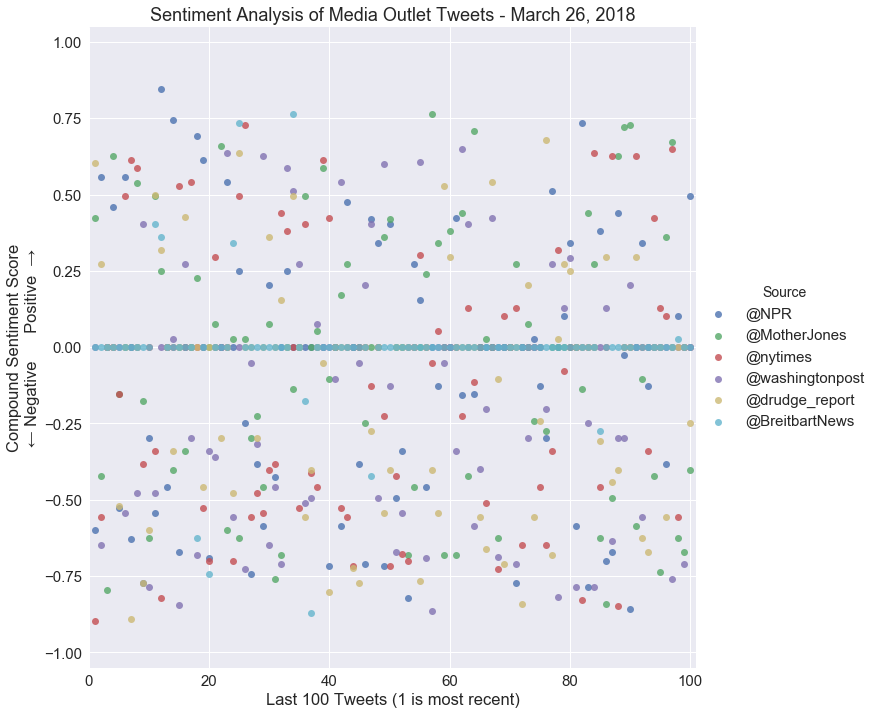

In [7]:
# Graph the compound sentiment for each tweet by source

sns.set(style="darkgrid", font_scale=1.5)

sns.lmplot(x="Number", y="Compound Score", data=master_df, size=10, hue="Source", legend_out=True, fit_reg=False)

plt.title("Sentiment Analysis of Media Outlet Tweets - March 26, 2018")
plt.ylabel("Compound Sentiment Score\n← Negative      Positive  →")
plt.ylim(-1.05,1.05)
plt.xlabel("Last 100 Tweets (1 is most recent)")
plt.xlim(0, 101)

plt.savefig("HW7.1_Sentiment Analysis by Tweets.png")

plt.show()

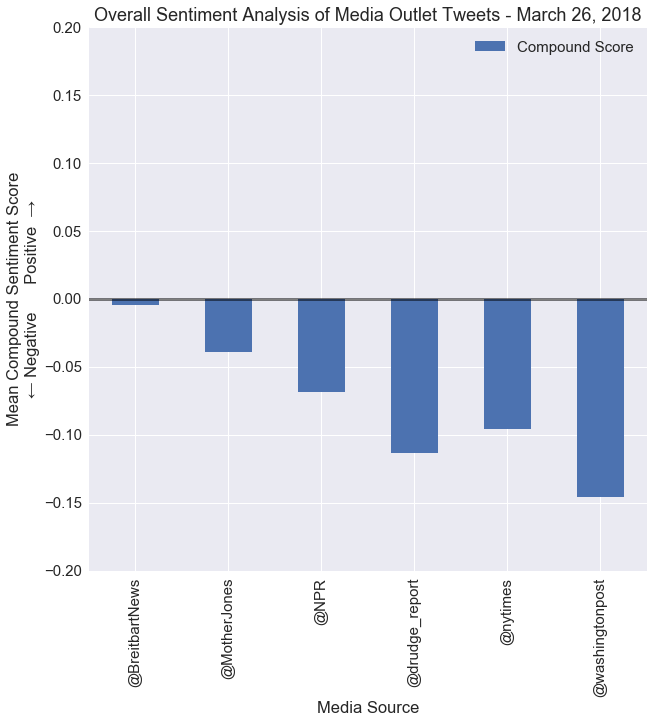

In [8]:
# Graph mean compund scores for each news source

sentiment_df = master_df.groupby(["Source"]).mean()
sentiment_df = sentiment_df[["Compound Score"]]

sns.set(style="darkgrid", font_scale=1.5)

sentiment_df.plot(kind="bar", figsize=(10,10))

plt.title("Overall Sentiment Analysis of Media Outlet Tweets - March 26, 2018")
plt.ylabel("Mean Compound Sentiment Score\n← Negative      Positive  →")
plt.ylim(-0.2,0.2)
plt.xlabel("Media Source")
plt.hlines(0, -1, 6, lw=3, colors="#000000", alpha=0.5)

plt.savefig("HW7.1_Sentiment Analysis by Source.png")

plt.show()

In [18]:
print("Three Trends from Media Outlet Social Analytics: ")
print("\n1. The initial data suggest that a large proportion of all tweets may be categorized as neutral.")
print("\n2. Although a statistical analysis has not been conducted, there does not appear to be an immediately apparent trend in the directionality of sentiments related to the journalistic, liberal-, or conservative-leaning outlets.")
print("\n3. Sentiment analysis results should not be generalized based on a small sample, as this is related as much \nto the news of the day as to the voice of the media outlet. Comparative sentiment analysis of media outlets \nwould be best understood for tweets by the outlet, and by the anlayzed tweets, on an apples-to-apples basis \nin terms of the stories or topics being tweeted about.")

Three Trends from Media Outlet Social Analytics: 

1. The initial data suggest that a large proportion of all tweets may be categorized as neutral.

2. Although a statistical analysis has not been conducted, there does not appear to be an immediately apparent trend in the directionality of sentiments related to the journalistic, liberal-, or conservative-leaning outlets.

3. Sentiment analysis results should not be generalized based on a small sample, as this is related as much 
to the news of the day as to the voice of the media outlet. Comparative sentiment analysis of media outlets 
would be best understood for tweets by the outlet, and by the anlayzed tweets, on an apples-to-apples basis 
in terms of the stories or topics being tweeted about.
